In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.style as style

In [2]:
def sort_csv(csv_file):
    df = pd.read_csv(csv_file)
    sorted_df = df.sort_values(by="score/len", ascending=True)
    sorted_df["score/len"] = pd.to_numeric(sorted_df["score/len"], downcast="float", errors="coerce")
    sorted_df["seq_len"] = pd.to_numeric(sorted_df["seq_len"], downcast="integer", errors="coerce")
    sorted_df["best_score"] = pd.to_numeric(sorted_df["best_score"], downcast="float", errors="coerce")
    sorted_df = sorted_df[sorted_df["score/len"]<0]
    sorted_df = sorted_df[sorted_df["score/len"]>-40]
    sorted_df['seq_len'] = sorted_df['seq_len'].astype('int')
    print(sorted_df)
    return sorted_df

In [3]:
paula_output = sort_csv('./post_relax_data_paula_output.csv') 
paula_output2 = sort_csv('./post_relax_data_paula_output2.csv')
paula_output3 = sort_csv('./post_relax_data_paula_output2.csv')

      score/len  best_score  seq_len                    pdb_name
2774 -11.554224 -670.145020       58  relax_run2_188_000003_0004
2131 -11.589580 -579.479004       50  relax_run2_154_000013_0003
1599 -12.446930 -709.474976       57   relax_run2_13_000008_0002
5118 -12.491233 -749.473999       60   relax_run2_83_000017_0005
2974 -12.499567 -749.973999       60  relax_run2_196_000019_0002
...         ...         ...      ...                         ...
4987 -19.774375 -790.974976       40   relax_run2_73_000003_0005
1111 -19.806825 -792.273010       40  relax_run2_105_000007_0003
1441 -19.878350 -795.133972       40   relax_run2_12_000010_0004
1342 -20.022150 -800.885986       40  relax_run2_115_000011_0003
2877  -5.470767 -328.246002       60  relax_run2_192_000011_0004

[5389 rows x 4 columns]
      score/len  best_score  seq_len                    pdb_name
4866 -10.408160 -780.612000       75   relax_run2_73_000001_0003
12   -10.490514 -776.297974       74        relax_10_000037_0003


In [4]:
   '''
    from matplotlib import rc
    rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
    rc('text', usetex=True)

    import matplotlib.font_manager
    import os
    fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v300.json"))

    fm.findfont("serif", rebuild_if_missing=False)
    '''

'\n from matplotlib import rc\n rc(\'font\',**{\'family\':\'serif\',\'serif\':[\'Computer Modern Roman\']})\n rc(\'text\', usetex=True)\n\n import matplotlib.font_manager\n import os\n fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v300.json"))\n\n fm.findfont("serif", rebuild_if_missing=False)\n '

In [19]:
def make_histogram(output, ten_percent, color_choice, title):

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    kwargs_title={'fontsize':40, 'weight':'bold', 'color':'0.2'}
    kwargs_label={'fontsize':35, 'weight':'bold', 'color':'0.2'}
    kwargs_ticks={'fontsize':30, 'weight':'bold', 'color':'0.2'}
    kwargs_plots={'linewidth':2}


    # Axes
    plt.title("Post FastRelax Filter Step:\n" + title + "\n",**kwargs_title)
    plt.ylabel("Frequency of Designs\n",**kwargs_label)
    plt.xlabel("\nTotal Score / Seq Len (REU)",**kwargs_label)
    plt.yticks(**kwargs_ticks)
    plt.xticks(**kwargs_ticks)

    plt.xlim(-22,-10)
    plt.vlines(ten_percent, 0, 1000, color='black', linestyle='dashed', linewidth=10, label='Top 10%')
  #  leg = plt.legend(loc = 'upper right', fontsize = 'xx-large')
   # leg.get_frame().set_linewidth(1)
    #ax.set_xticklabels(np.arange(5,96,5))

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=2.5,length=5,pad=10, color='0.2')
    style.use('bmh')


    # plt.plot(norm_var,label='variance',color='#9b2226',**kwargs_plots)
    # plt.plot(norm_var,label='variance',color='#ae2012',**kwargs_plots)
    # plt.plot(norm_lddt,label='lddt',color='gray',**kwargs_plots)
    plt.hist(output["score/len"], bins=15, color = color_choice, edgecolor="black", **kwargs_plots)
    plt.savefig('histogram_' + title + '.png',dpi=300,bbox_inches='tight')
    # Legend
    # plt.rc('font',family='Arial',weight='bold')
    # plt.rc('legend' )
    # l = plt.legend(loc=2, prop={'size': 25})
    # for text in l.get_texts():
    #     text.set_color("0.2")


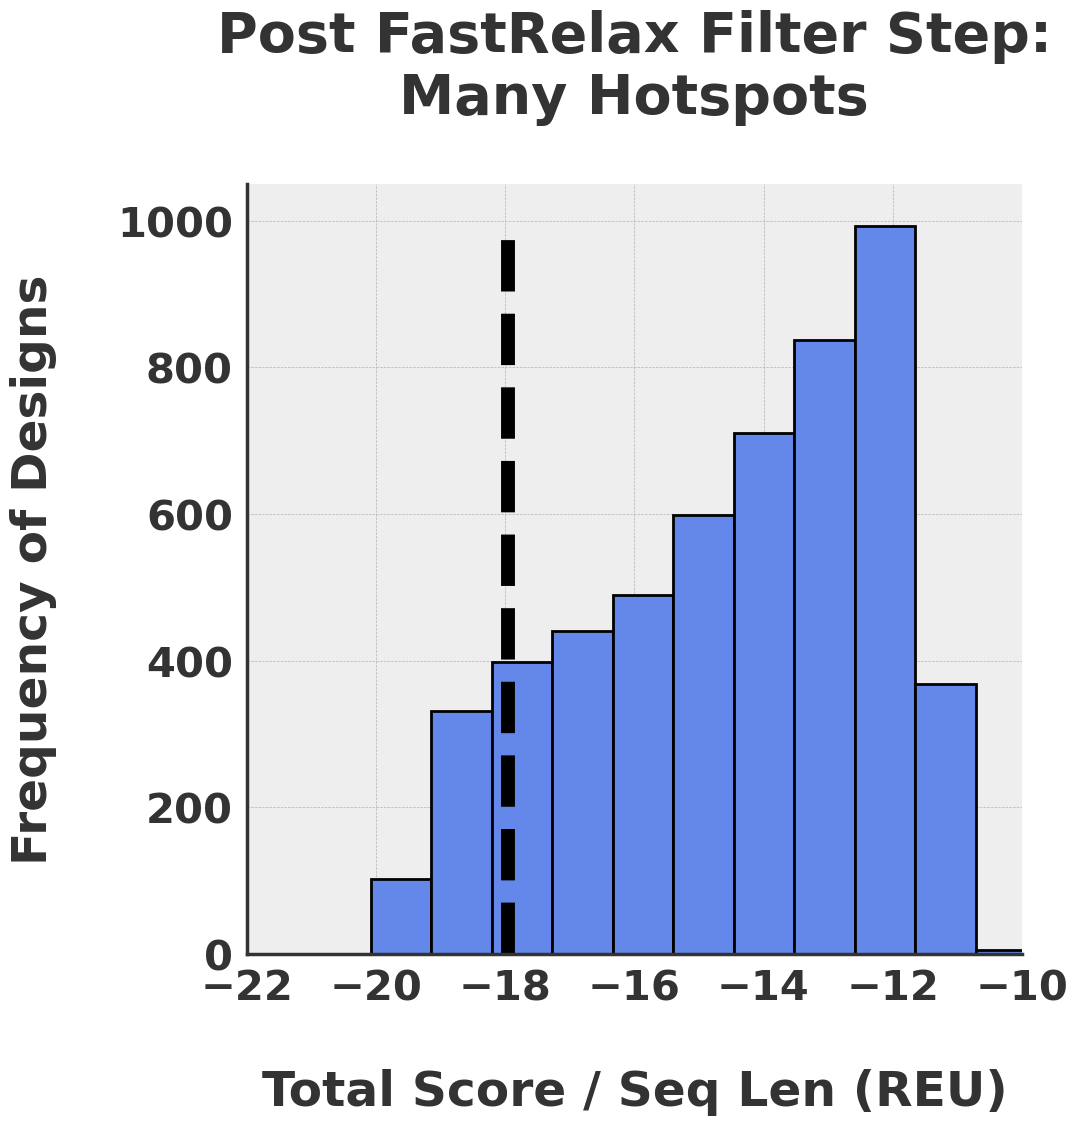

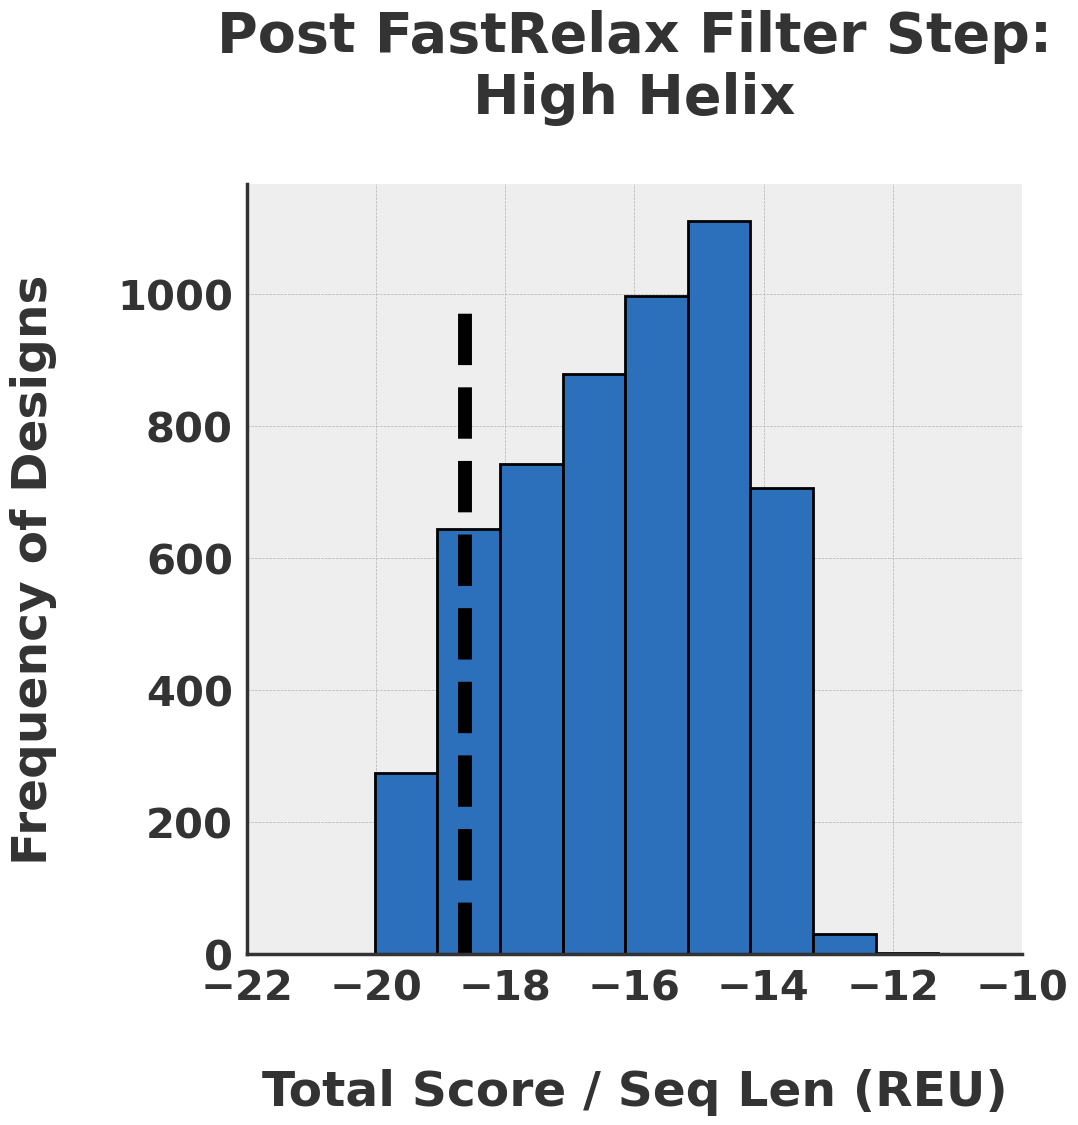

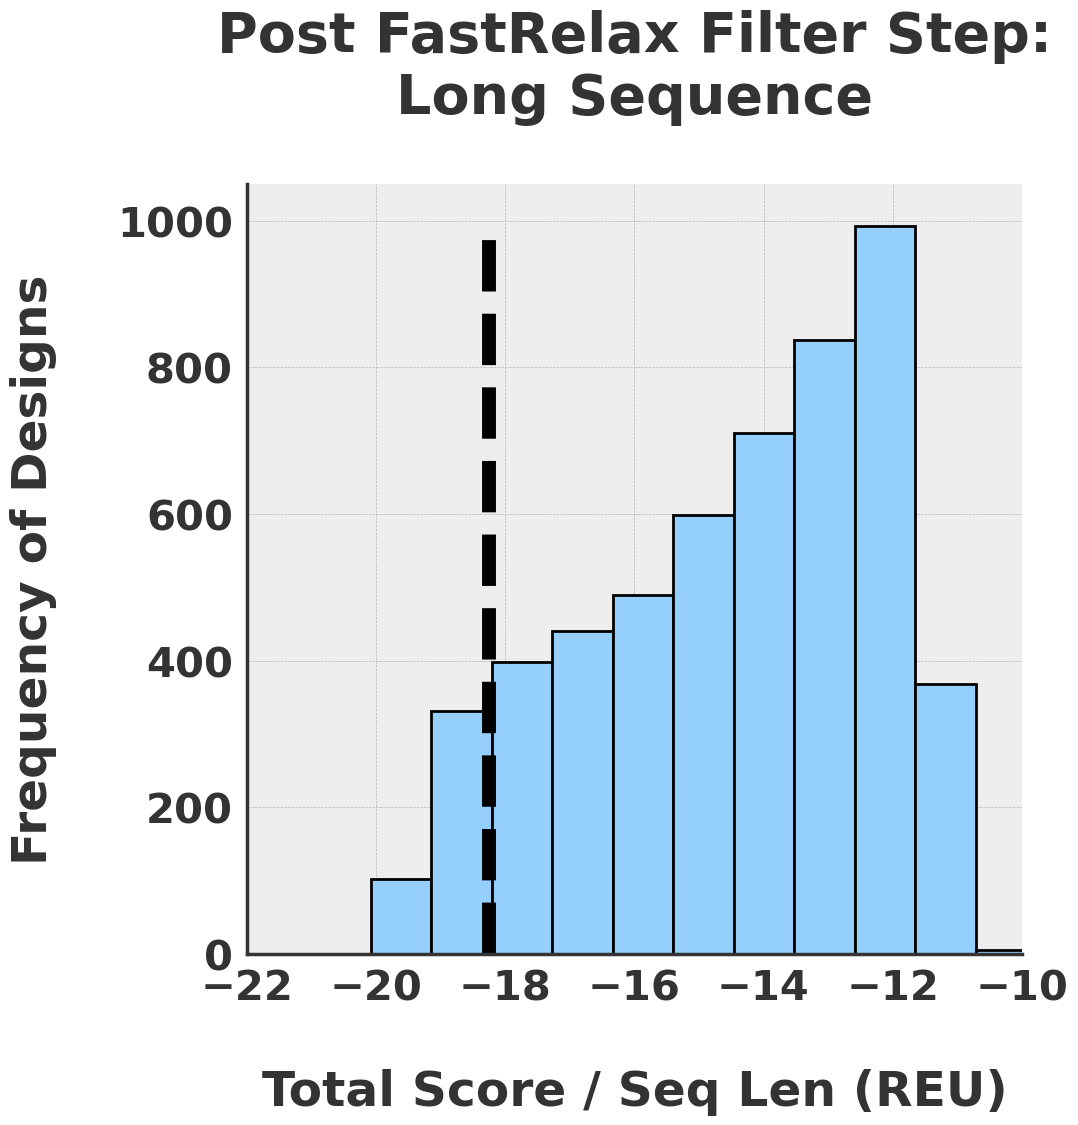

In [20]:
make_histogram(paula_output2, -17.960, '#6488EA', "Many Hotspots")
make_histogram(paula_output, -18.617, '#2c6fbb', "High Helix")
make_histogram(paula_output3, -18.246, '#95D0FC', "Long Sequence")
#4E518B
#952E8F
#FCE166
#f1f33f
#5170d7
#26538d

In [15]:
def make_docking_histogram(csv, title, ten_percent, color_choice):
    
    output = pd.read_csv(csv)
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    kwargs_title={'fontsize':40, 'weight':'bold', 'color':'0.2'}
    kwargs_label={'fontsize':35, 'weight':'bold', 'color':'0.2'}
    kwargs_ticks={'fontsize':25, 'weight':'bold', 'color':'0.2'}
    kwargs_plots={'linewidth':2}


    # Axes
    plt.title("Post Docking Filter Step:\n" + title + "\n",**kwargs_title)
    plt.ylabel("Frequency of Designs\n",**kwargs_label)
    plt.xlabel("\nInterface Score (REU)",**kwargs_label)
    plt.yticks(**kwargs_ticks)
    plt.xticks(**kwargs_ticks)

    plt.xlim(-40,-5)
    plt.vlines(ten_percent, 0, 125, color='black', linestyle='dashed', linewidth=10, label='Top 10%')
  #  leg = plt.legend(loc = 'upper right', fontsize = 'xx-large')
   # leg.get_frame().set_linewidth(1)
    #ax.set_xticklabels(np.arange(5,96,5))

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=2.5,length=5,pad=10, color='0.2')
    style.use('bmh')


    # plt.plot(norm_var,label='variance',color='#9b2226',**kwargs_plots)
    # plt.plot(norm_var,label='variance',color='#ae2012',**kwargs_plots)
    # plt.plot(norm_lddt,label='lddt',color='gray',**kwargs_plots)
    plt.hist(output["I_sc"], bins=15, color = color_choice, edgecolor="black", **kwargs_plots)
    plt.savefig('post_docking_histogram_' + title + '.png',dpi=300,bbox_inches='tight')

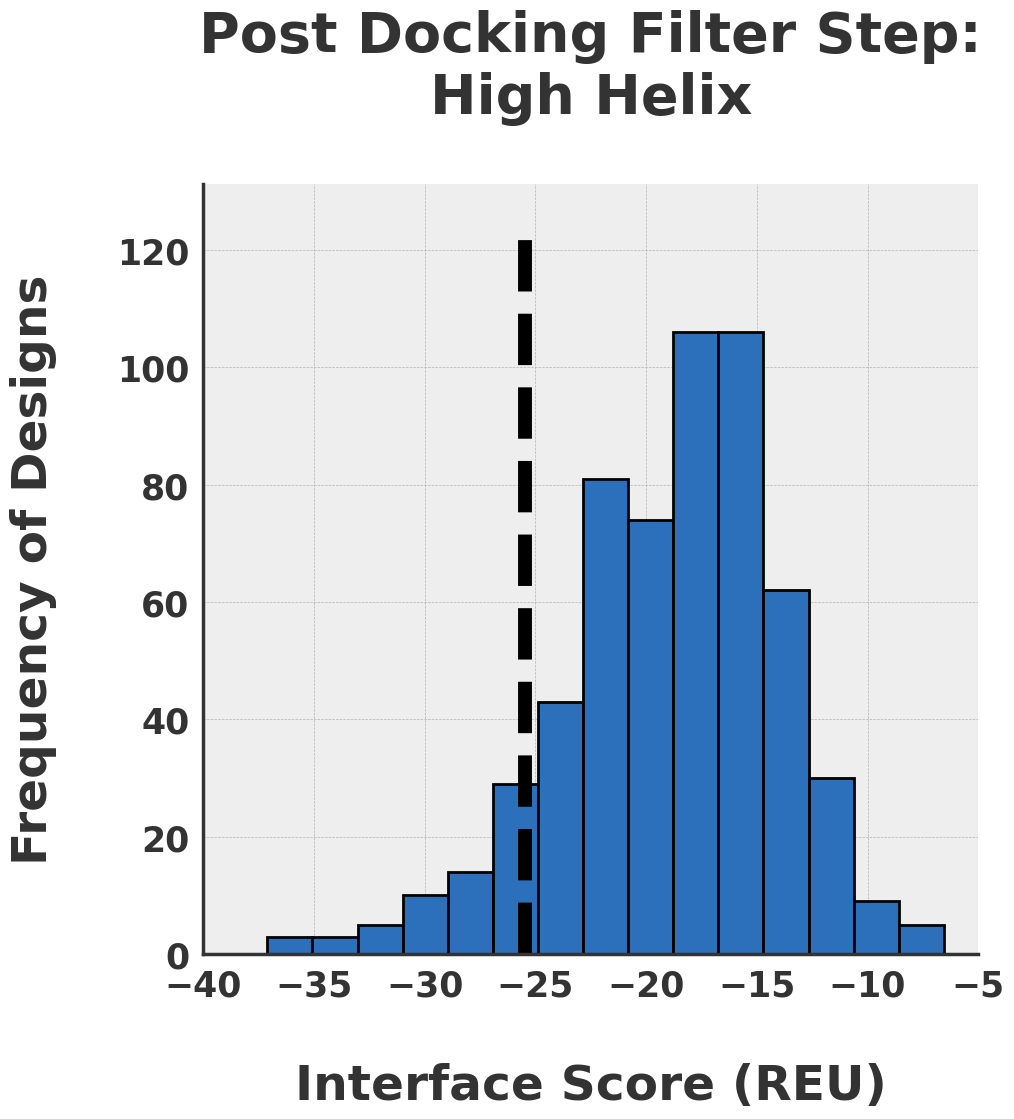

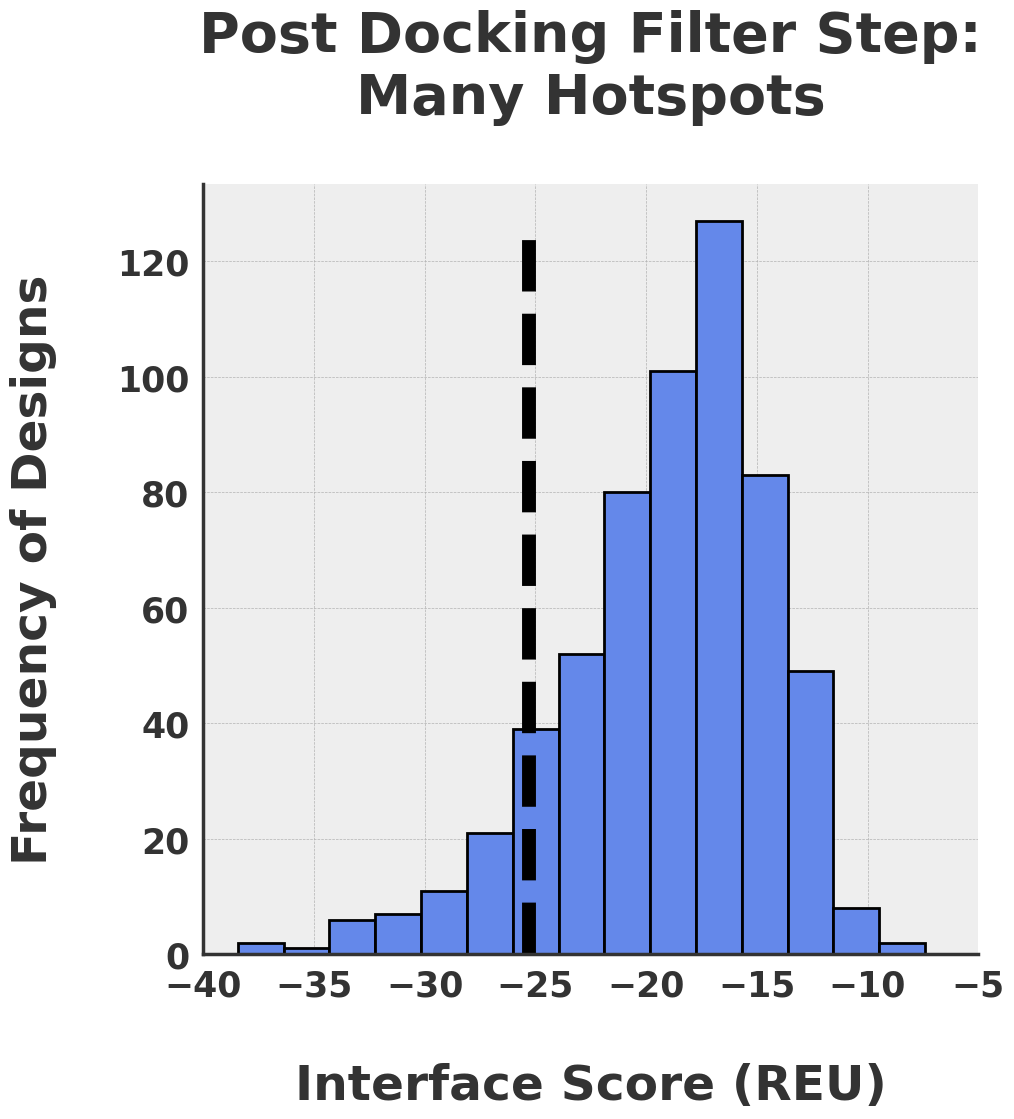

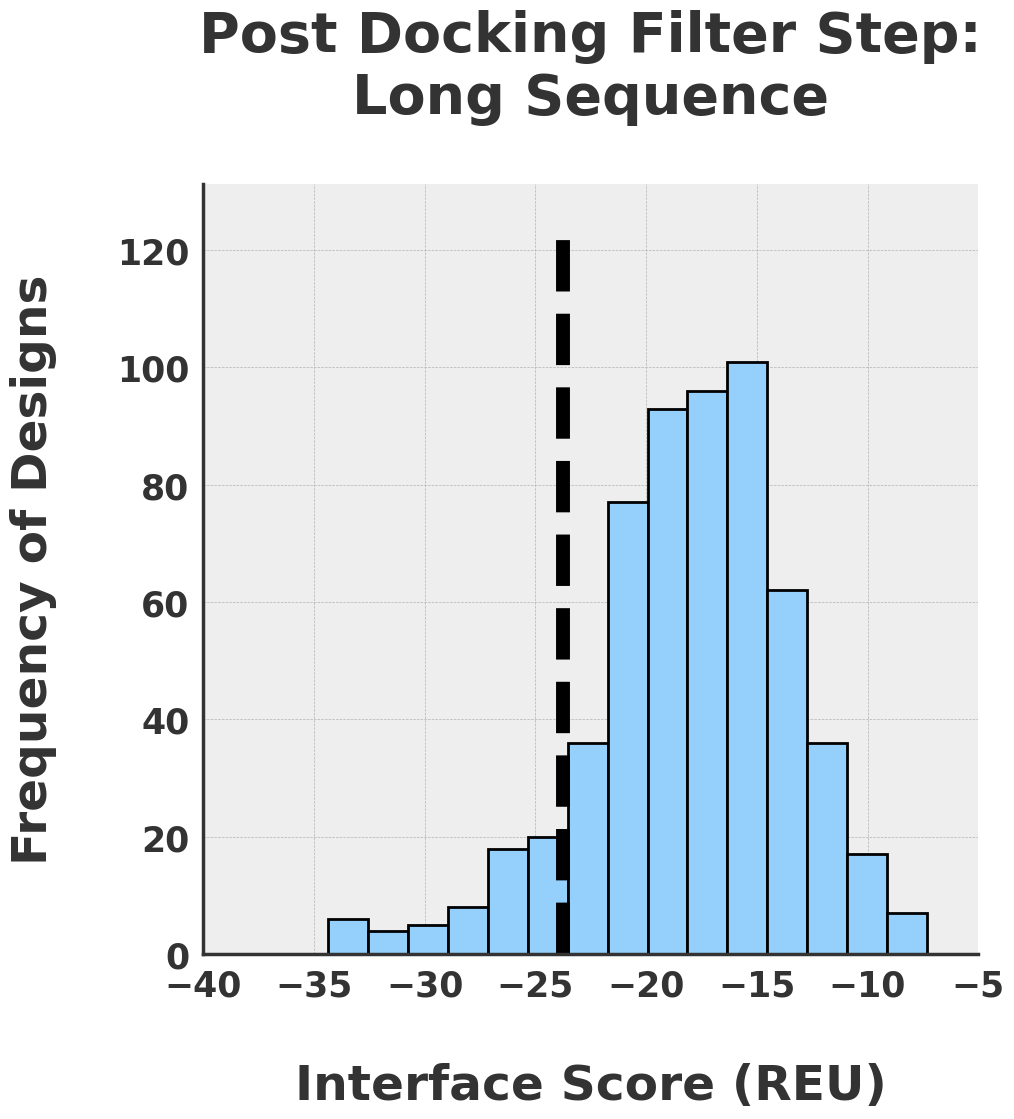

In [16]:
make_docking_histogram('./top600_paula_output_designs.csv', "High Helix", -25.461, '#2c6fbb')
make_docking_histogram('./top600_paula_output2_designs.csv', "Many Hotspots", -25.280, '#6488EA')
make_docking_histogram('./top600_paula_output3_designs.csv', "Long Sequence", -23.760, '#95D0FC')

In [9]:
def seq_len_scatter(output, palette_choice, title):
    fig, ax = plt.subplots(1,1,figsize=(30,10))

    kwargs_title={'fontsize':35, 'weight':'bold', 'color':'0.2'}
    kwargs_label={'fontsize':45, 'weight':'bold', 'color':'0.2'}
    kwargs_ticks={'fontsize':30, 'weight':'bold', 'color':'0.2'}
    kwargs_plots={'linewidth':2}
    kwargs_box={'boxprops':{ 'edgecolor':'0.2','zorder':2}}


    # Axes
    plt.title("Relationship Between Sequence Length and Total Score: " + title + "\n",**kwargs_title)
    plt.ylabel("Total Score\n",**kwargs_label)
    plt.xlabel("\nSequence Length",**kwargs_label)
    plt.yticks(**kwargs_ticks)
    plt.xticks(**kwargs_ticks)

    #plt.xlim(-22,-10)
    ax.set_xticklabels(np.arange(5,96,5))

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=2.5,length=5,pad=10, color='0.2')
    

    # plt.plot(norm_var,label='variance',color='#9b2226',**kwargs_plots)
    # plt.plot(norm_var,label='variance',color='#ae2012',**kwargs_plots)
    # plt.plot(norm_lddt,label='lddt',color='gray',**kwargs_plots)
    sns.set_style("whitegrid")
    sns.boxplot(x=output["seq_len"],y=output["best_score"],data=output,linewidth=2.5,width=.3,showfliers=False, ax=ax,**kwargs_box,palette=palette_choice)
    plt.xlabel("\nSequence Length", fontsize=35)
    plt.ylabel("Total Score\n", fontsize=35)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.savefig('boxplot_' + title + '.png',dpi=300,bbox_inches='tight')

/tmp/ipykernel_9255/3007725260.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(5,96,5))
/tmp/ipykernel_9255/3007725260.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(5,96,5))
/tmp/ipykernel_9255/3007725260.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(5,96,5))


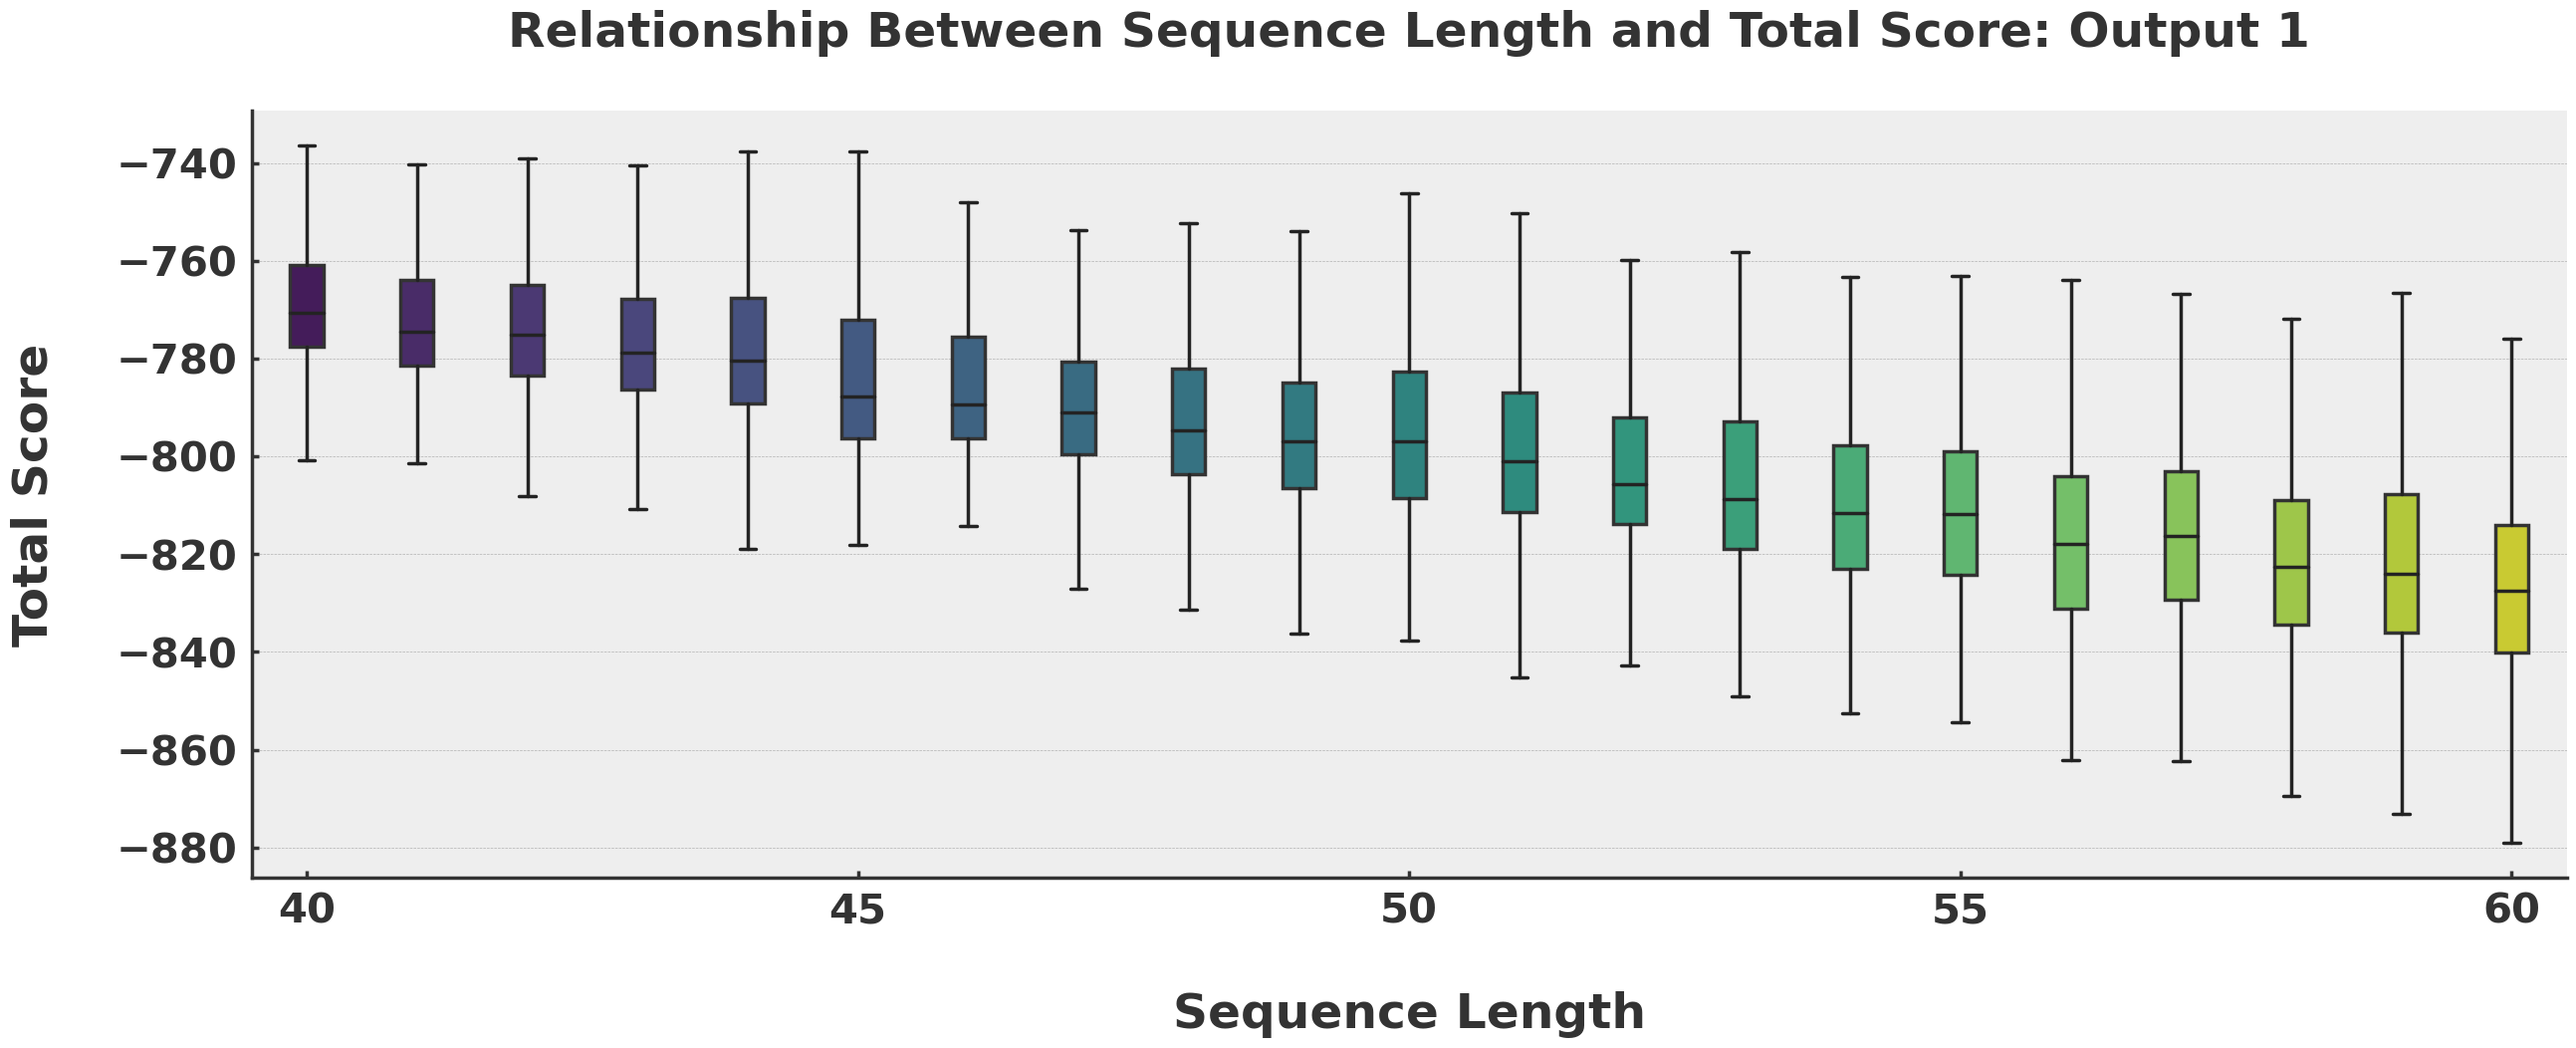

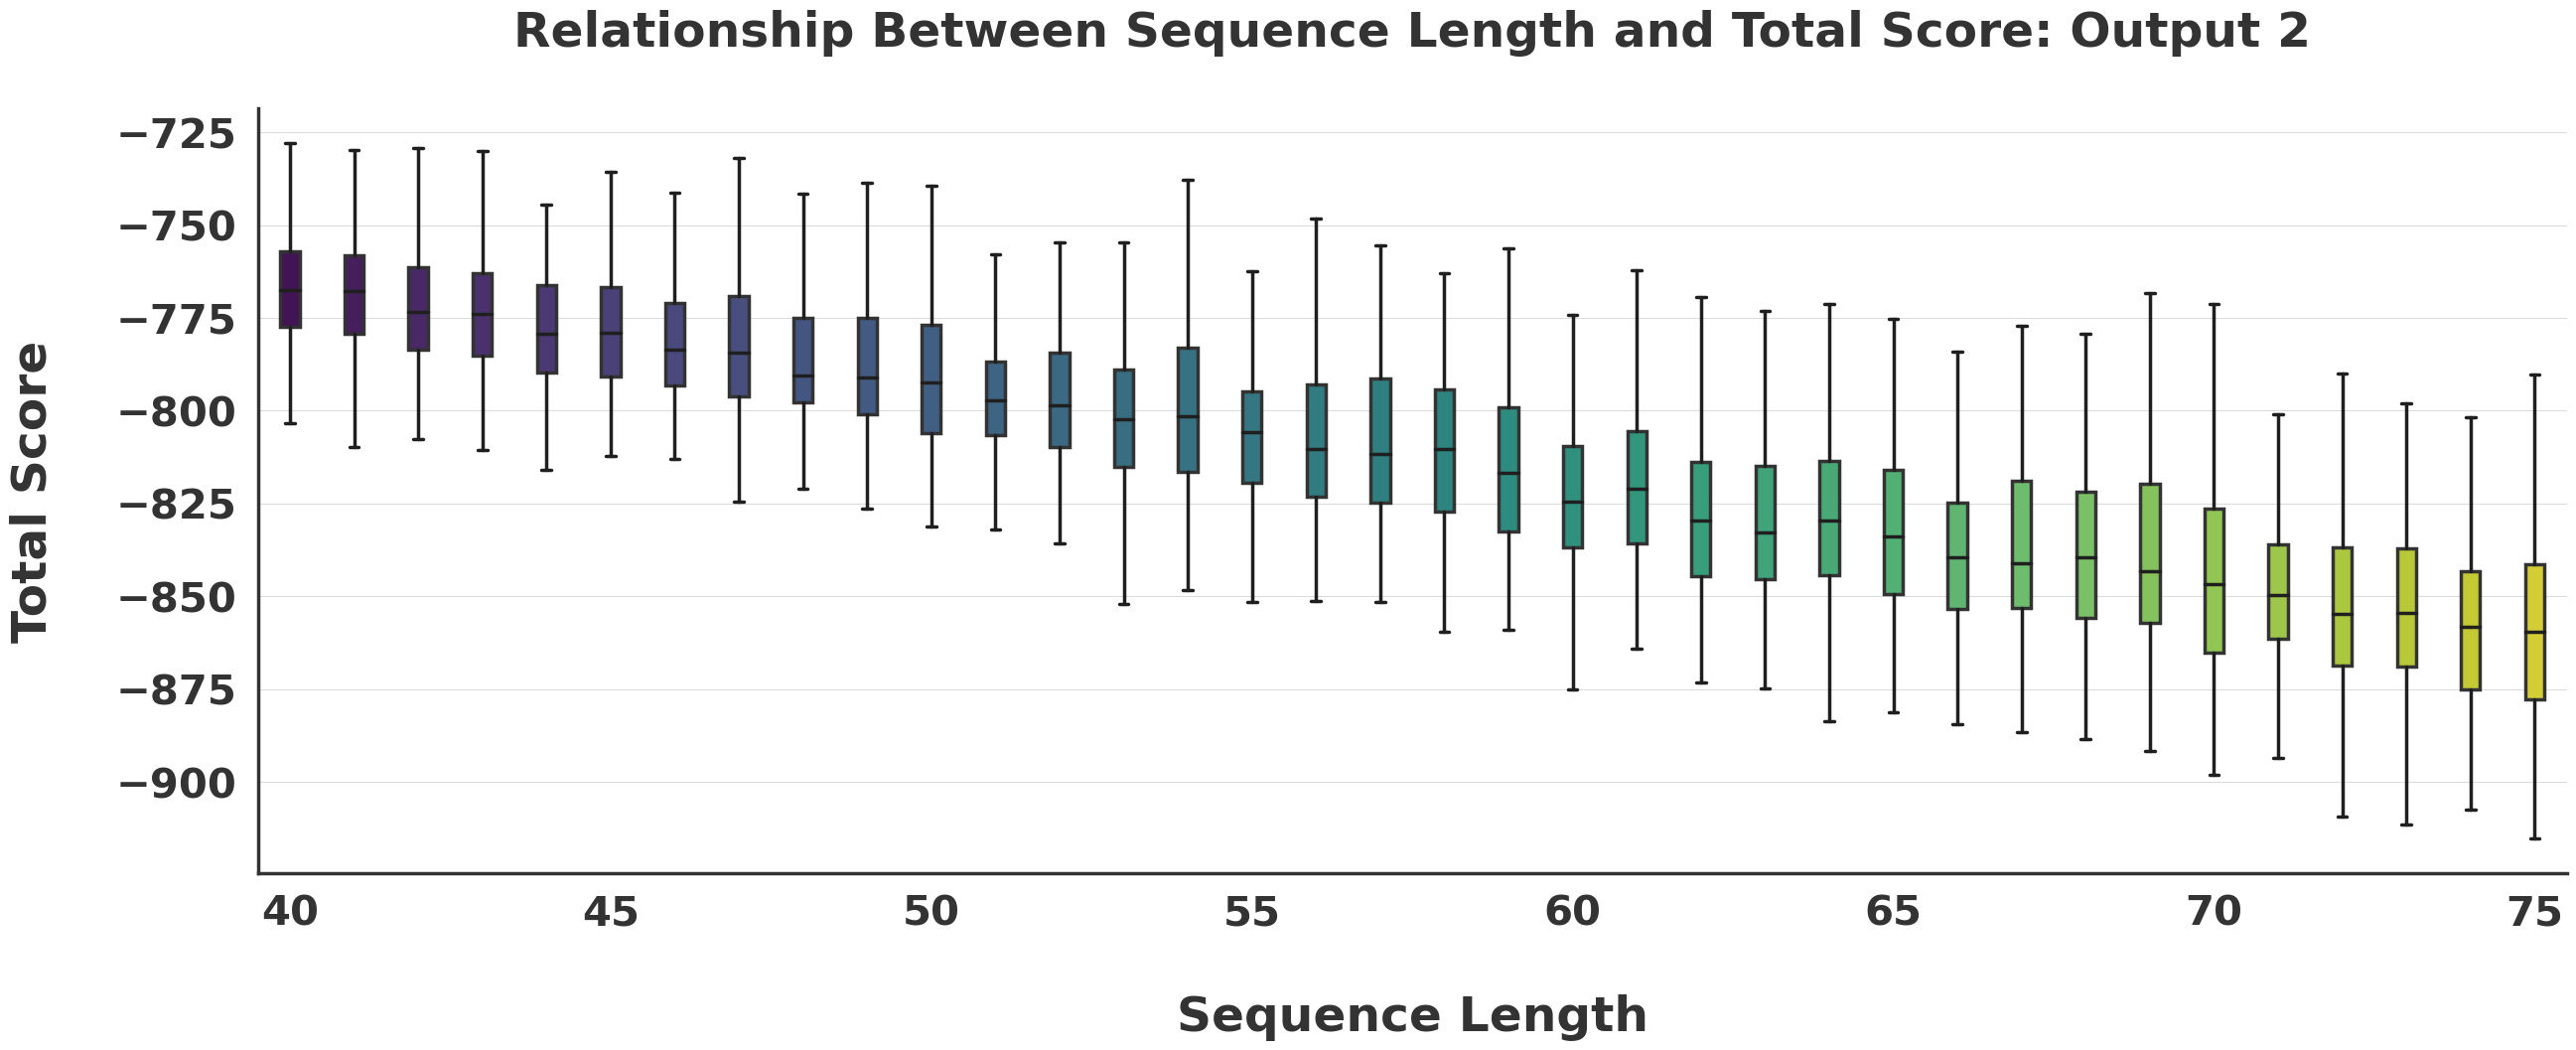

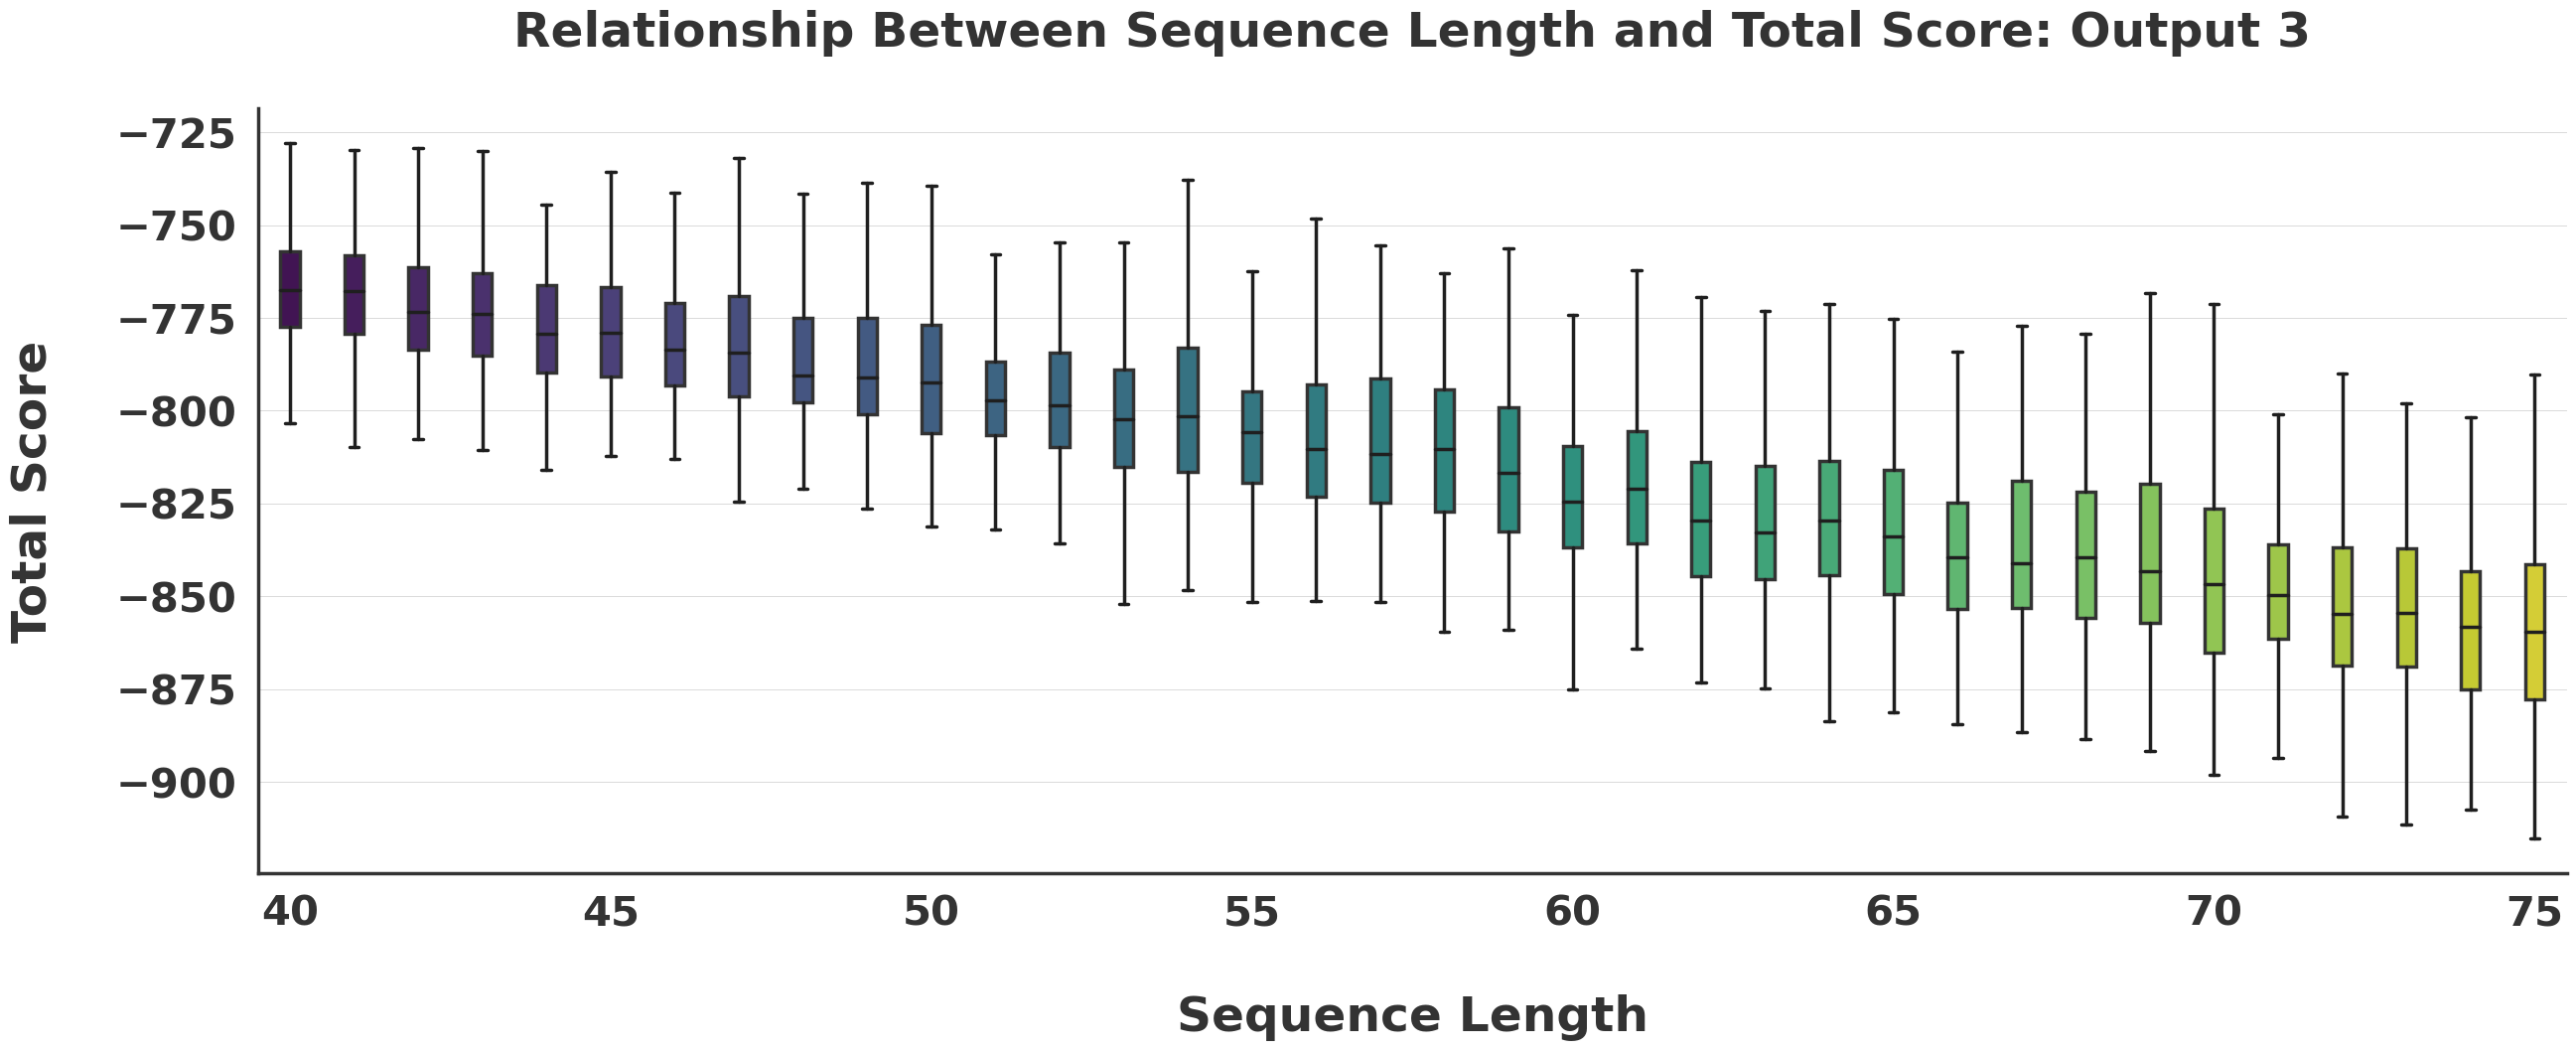

In [10]:
seq_len_scatter(paula_output, 'viridis', "Output 1")
seq_len_scatter(paula_output2, 'viridis', "Output 2")
seq_len_scatter(paula_output3, 'viridis', "Output 3")

In [11]:
def seq_len_histogram(output):
    fig, ax = plt.subplots(1,1,figsize=(10,12))

    kwargs_title={'fontsize':20, 'weight':'bold', 'color':'0.2'}
    kwargs_label={'fontsize':20, 'weight':'bold', 'color':'0.2'}
    kwargs_ticks={'fontsize':20, 'weight':'bold', 'color':'0.2'}
    kwargs_plots={'linewidth':2}


    # Axes
    plt.title("Analysis of ProteinGenerator Designs\n Based on Sequence Length\n",**kwargs_title)
    plt.ylabel("Frequency\n",**kwargs_label)
    plt.xlabel("\nSequence Length",**kwargs_label)
    plt.yticks(**kwargs_ticks)
    plt.xticks(**kwargs_ticks)

    #ax.set_xticklabels(np.arange(5,96,5))

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=2.5,length=5,pad=10, color='0.2')


    # plt.plot(norm_var,label='variance',color='#9b2226',**kwargs_plots)
    # plt.plot(norm_var,label='variance',color='#ae2012',**kwargs_plots)
    # plt.plot(norm_lddt,label='lddt',color='gray',**kwargs_plots)
    plt.hist(output["seq_len"],color='#6495ED', bins=12, edgecolor="black", **kwargs_plots)

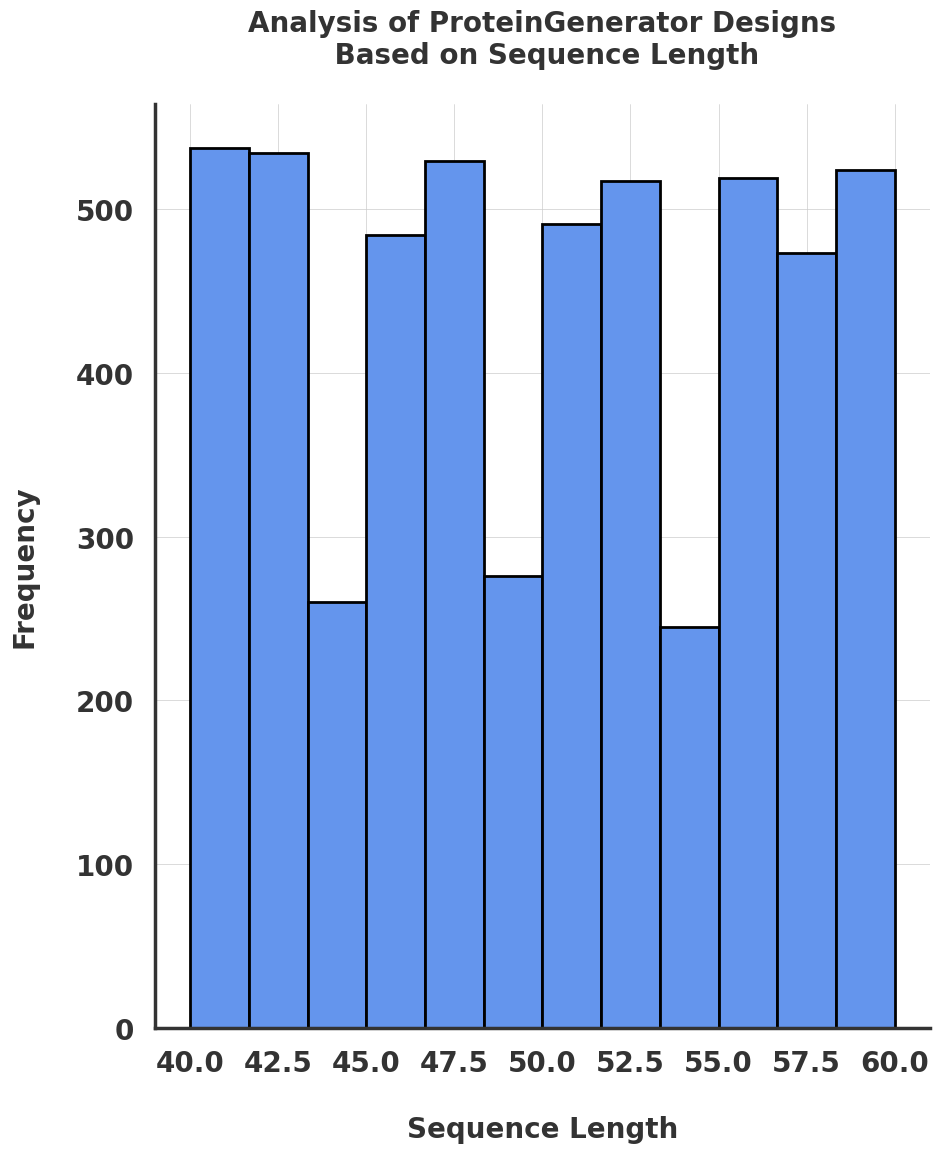

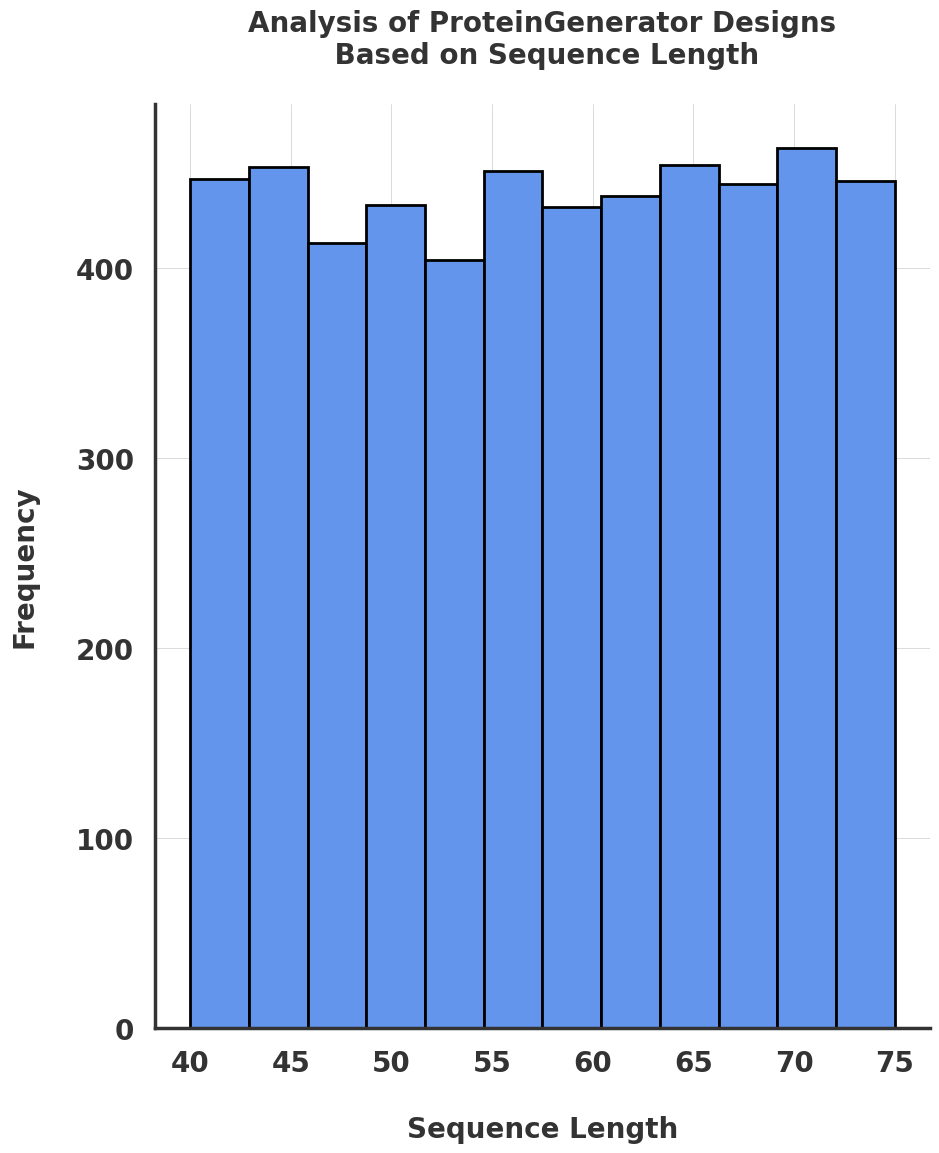

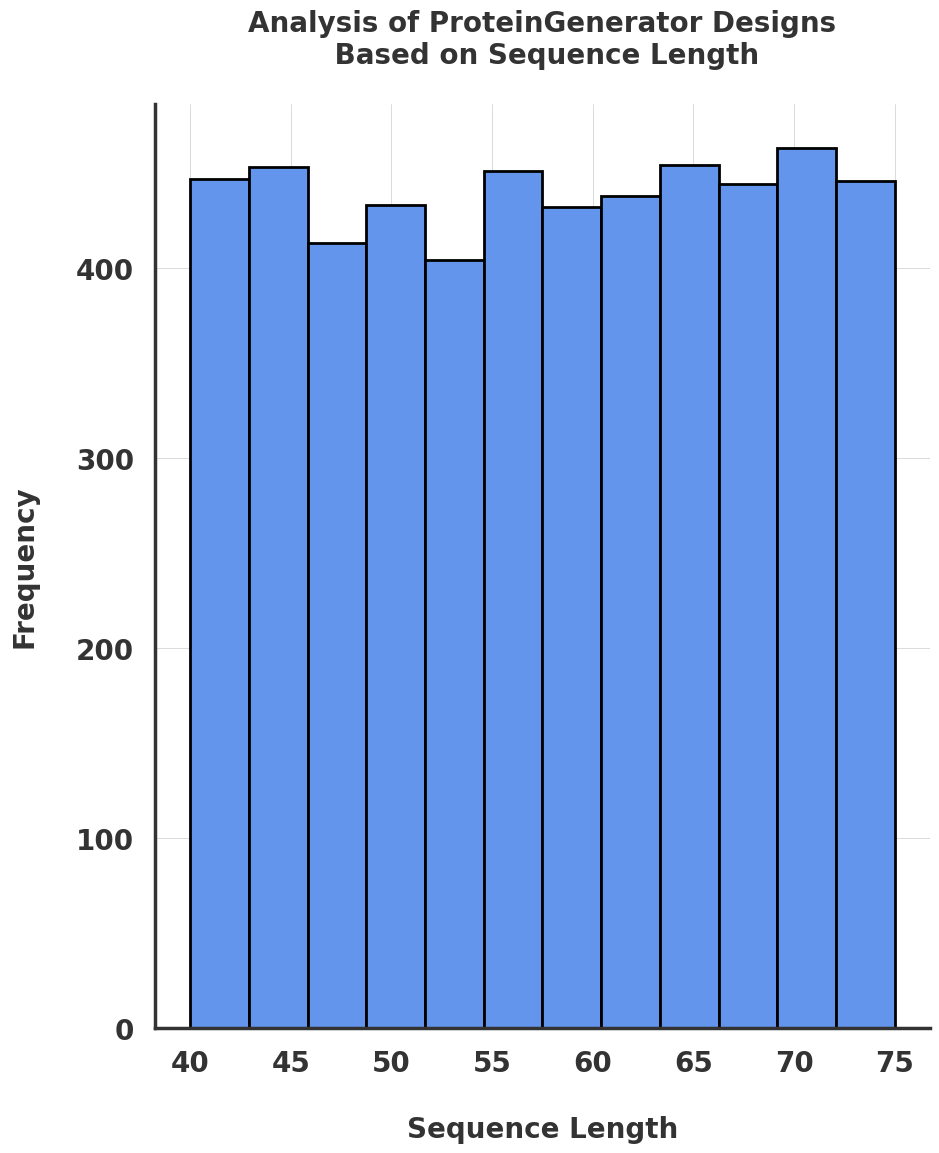

In [12]:
seq_len_histogram(paula_output)
seq_len_histogram(paula_output2)
seq_len_histogram(paula_output3)